# Lab Session 8 - Coursework Assignment #2
## Preliminaries
In this coursework you will analyse stocks comprising the Standard and Poor's 100 index. The assignment has been structured into separate exercises given below.

You will need to download a .csv-file containing daily adjusted closing prices for the components of the S&P 100 index. This data can be downloaded from the KEATS page.

You can then read this file into a Pandas DataFrame using code similar to that below.



## Import necessary libaries
- import numpy for scientific computing 
- import pandas for transforming csv to dataframe

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

> First, I will check the current working path.

In [144]:
import os
current_path = os.getcwd()
print(current_path)

/Users/andrewyang/Desktop/workspace/Scientific-Computing-For-Finance/lab8


> And then download the S&P index csv "sap100.csv" and move it under the working path we got on the previous step.
> We'll check if the file really exists in the folder before doing futher analystics.

In [145]:
csv_path = current_path + '/sap100.csv'     # set the absolute path of the csv file
print(os.path.isfile(csv_path))             # Return true if the file exists

True


> 1. read the csv file we downloaded and checked last step by the function `pd.read_csv`
> 2. save the dataframe as `prices`
> 3. take a look of the dataframe `prices` to check if the indexs and columns are right by using the function `head()`

In [146]:
prices = pd.read_csv(csv_path)              # read the s&p 100 csv file and store it in a dataframe
prices.head()                               # check the dataframe

,Date,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
0,2016-06-06 00:00:00,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
1,2016-06-07 00:00:00,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2,2016-06-08 00:00:00,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
3,2016-06-09 00:00:00,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
4,2016-06-10 00:00:00,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997


> 1. We can see the dataframe has 102 columns, which is the fist 2 column `index` and `Date` with 100 stocks.
> 2. The Date type is "YYYY-MM-DD HH:MM:SS"
> 3. The price of the stocks are float numbers
> 4. I don't want the index 0, 1, 2... so I'll have to set `index_col='Date'` while import

In [147]:
prices = pd.read_csv(csv_path)                      # read the s&p 100 csv file and store it in a dataframe with Date as index
pd.to_datetime(prices['Date'])
prices.set_index(pd.to_datetime(prices['Date']), inplace=True)
prices = prices.drop('Date', axis=1)
prices.head()                                       # check the dataframe again

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-06,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,160.190002,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
2016-06-07,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,158.889999,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2016-06-08,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,158.000000,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
2016-06-09,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,156.779999,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
2016-06-10,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,154.779999,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997


## Exercise 1
Choose a single stock from the index, and compute the corresponding daily, monthly and annual log-returns. For each sampling frequency, test whether the returns are normally distributed. Include appropriate graphs in your final report and ensure that you clearly explain your analysis in your own words.



> My thoughts:
> 1. Choose a stock, which I decided to choose here is `Nvidia Corp`. Because I know more about this company and maybe having some basic knowledge of the company benifits the analyse.
> 2. The symbol for Nvidia Corp is `NVDA`
> 3. Select the column `NVDA` and save it as `nvda_price` with simply call `prices.NVDA`
> 4. plot the graph and check the graph (rotate the date label to make the plot readable)

<Axes: title={'center': 'NVDA'}, xlabel='Date', ylabel='Price'>

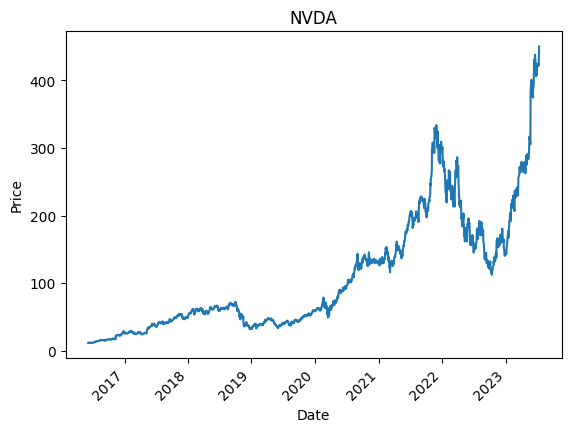

In [148]:
nvda_price = prices.NVDA
nvda_price.plot(title='NVDA',xlabel='Date', ylabel='Price',rot=45 )

> 5.  We will have to do resample and calculate the log returns for three different time ranges, so buliding a function might save more time
> 6.  Build a function called `get_log_return` which has the input of dataframe and the sampling time range, which outputs the plot after resample and the plot of the log return.
> 7. resample the daily, monthly and annual price and store them as `nvda_d`, `nvda_m`, `nvda_y`
> 

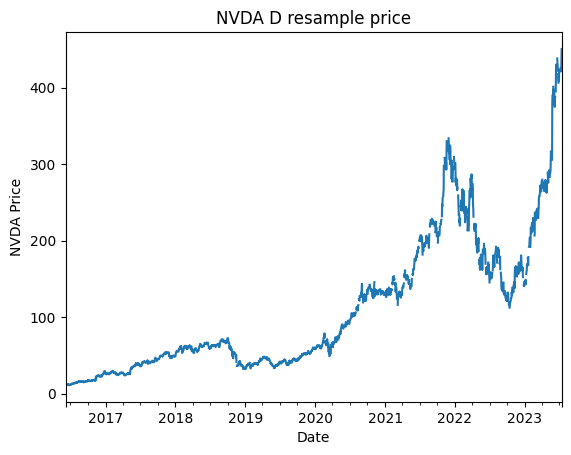

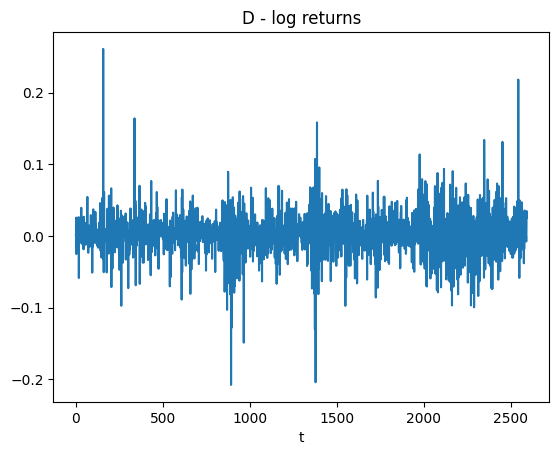

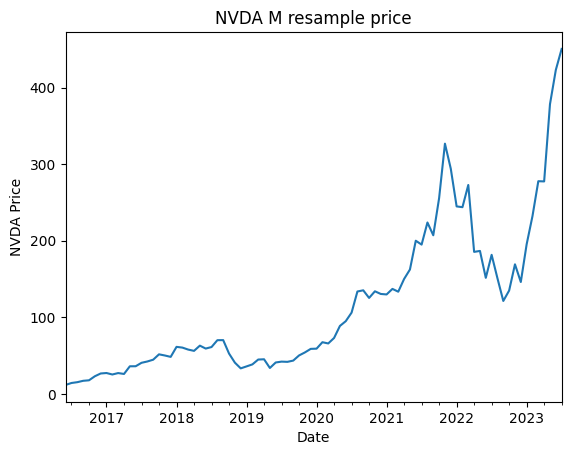

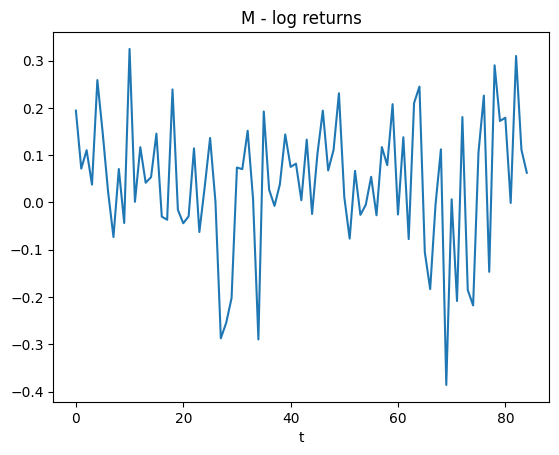

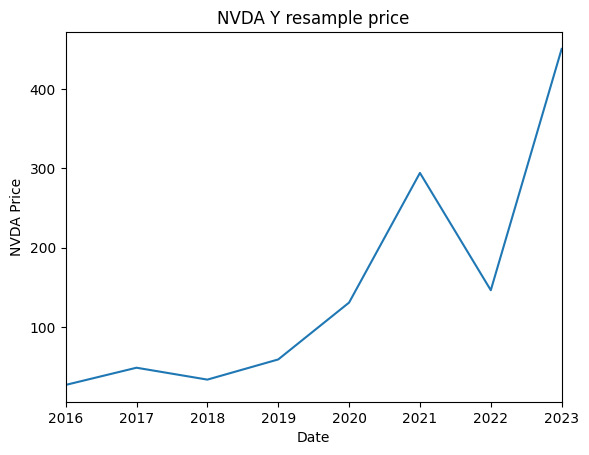

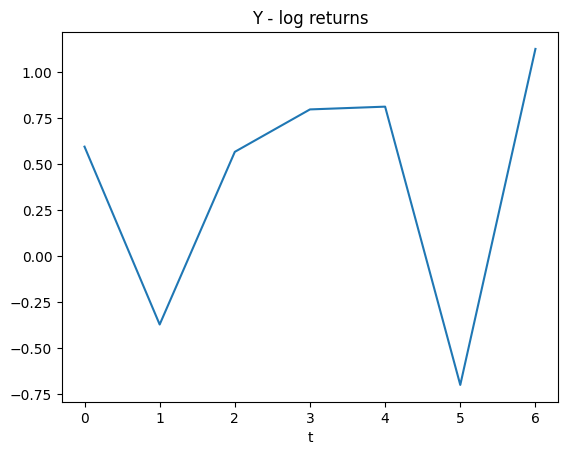

In [303]:
def resample(df, sample_size,stock_name, plot):
    resample_prices = df.resample(sample_size).last()
    if plot:
        resample_prices.plot()
        plt.title(stock_name+ ' '+sample_size+ ' resample price')
        plt.ylabel(stock_name + ' Price')
        plt.show()
    return resample_prices

def log_return(df,sample_size, plot):
    stock_returns = np.diff(np.log(df))
    if plot:
        plt.plot(stock_returns)
        plt.xlabel('t')
        plt.title(sample_size + ' - log returns')
        plt.show()
    return stock_returns

def get_log_return(df, sample_size, stock_name = 'NVDA',plot=True):
    resample_prices = resample(df, sample_size, stock_name, plot).ffill()
    stock_returns = log_return(resample_prices, sample_size, plot)
    return stock_returns

nvda_d = get_log_return(nvda_price,'D')
nvda_m = get_log_return(nvda_price,'M')
nvda_y = get_log_return(nvda_price,'Y')

> 8. Now we have the returns, it's time to check if they are normally distributed.
> 9. To check if a series is normally distributed, we can try to observe the `pd.describe`, `histogram`, `box plot` and the `qq plot`
> 10. Build a function to generate these three observations named `normally_dist_vis_check`

In [233]:
def normally_dist_vis_check(df, stock, frequency):
    print(df.describe())

    plt.figure(figsize=(12, 12))

    plt.subplot(221)
    sns.histplot(df, kde=True)
    plt.title(f'Histogram of {frequency} Returns')
    
    plt.subplot(222)
    stats.probplot(stock, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {frequency} Returns')
    
    plt.subplot(223)
    sns.boxplot(df)
    plt.title(f'Boxplot of {frequency} Returns')

    plt.suptitle(f'{frequency} Log Returns')
    plt.show()


> 11. We run the test on the daily returns first

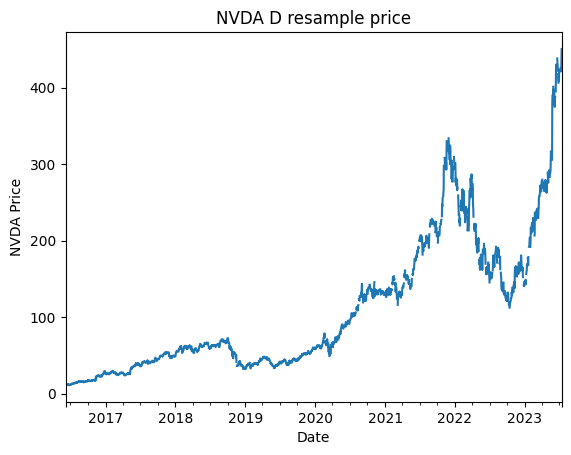

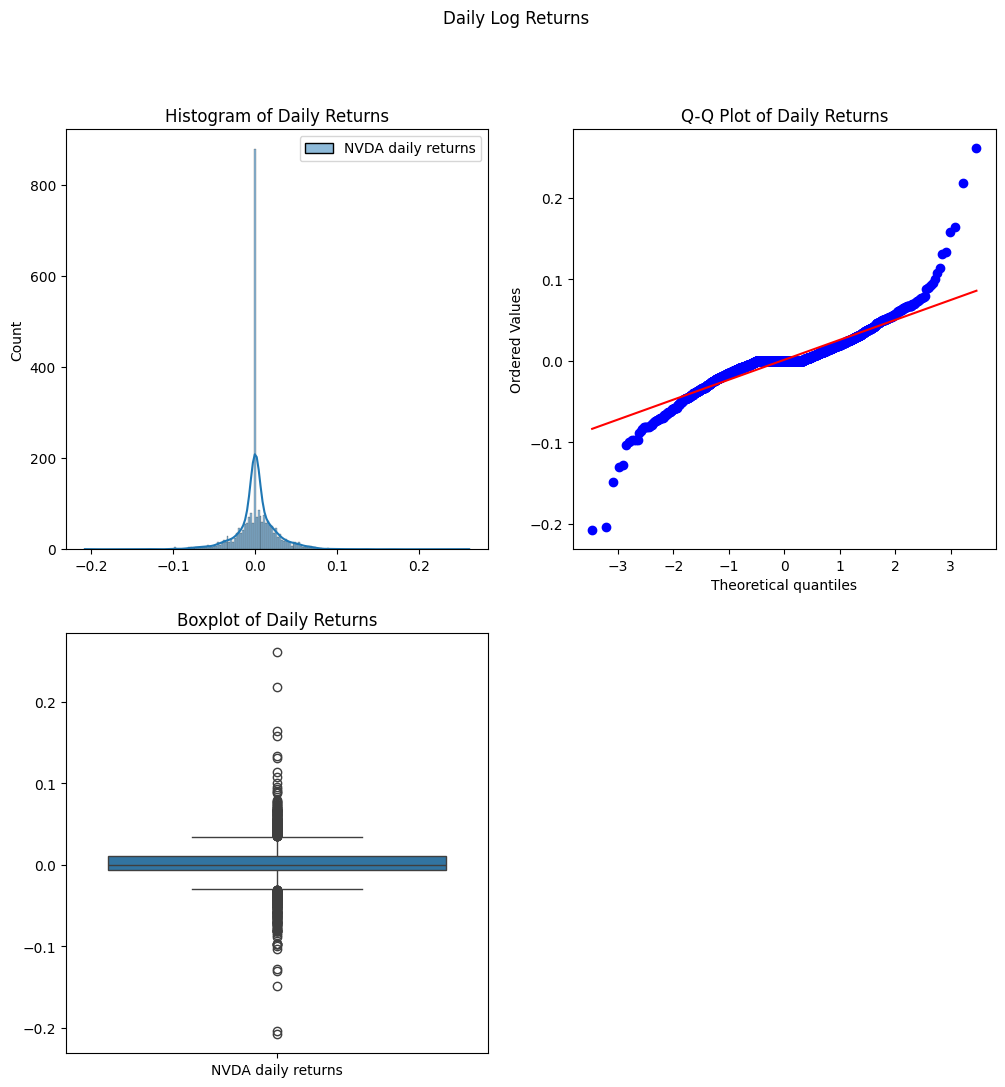

In [238]:

nvda_d_ = pd.DataFrame({'NVDA daily returns': nvda_d}, index=resample(nvda_price, 'D', plot=True).index[1:])
normally_dist_vis_check(nvda_d_,nvda_d, 'Daily')

We can find out that although the histogram is a bell shape, the qq plot and box plot all shows that the daily return isn't normally distributed. Moreover, I'll say it's a log normal distribution.

To be more accurate, I perform the Jarque_bera test through the function `stats.jarque_bera`, because the number of samples are large enough.

In [176]:
stats.jarque_bera(nvda_d)

SignificanceResult(statistic=14317.890522906022, pvalue=0.0)

Through the jarque bera test, we can see that the statistic number is far away from 0, and the pvalue is 0. So we can say that we have 0 chance to reject the fact that the daily log return is not normally distributed.

### Normaltest (D'Agostino and Pearson's test):
This test combines skewness and kurtosis to produce an omnibus test of normality. The skewness measures the asymmetry of the data around the sample mean, and the kurtosis measures the 'tailedness' of the distribution. A normal distribution has a skewness of zero and a kurtosis of three. The `normaltest` calculates how much the sample data deviates from these values and evaluates the significance of this deviation.

The test statistic is computed as:
```
s^2 + k^2
```
where `s` is the z-score of the skewness and `k` is the z-score of the kurtosis.

In [175]:
from scipy.stats import normaltest
daily_normal_test = normaltest(nvda_d)
daily_normal_test

NormaltestResult(statistic=519.414013199318, pvalue=1.6243519052138923e-113)

Through the normaltest, the statistic number is also very large, and the p_value is very small. So, we get the same result as jaque bera test.

> 12. Now we try the results on monthly return

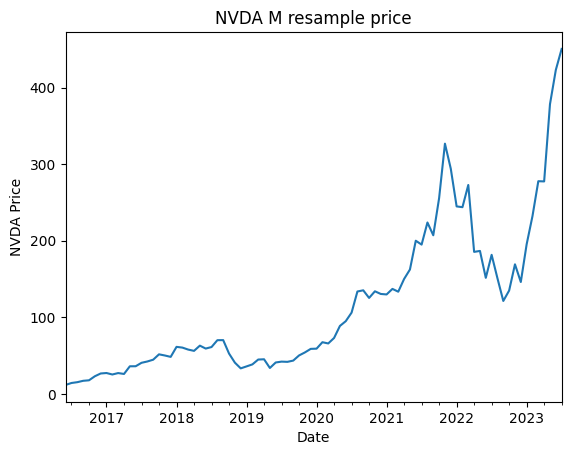

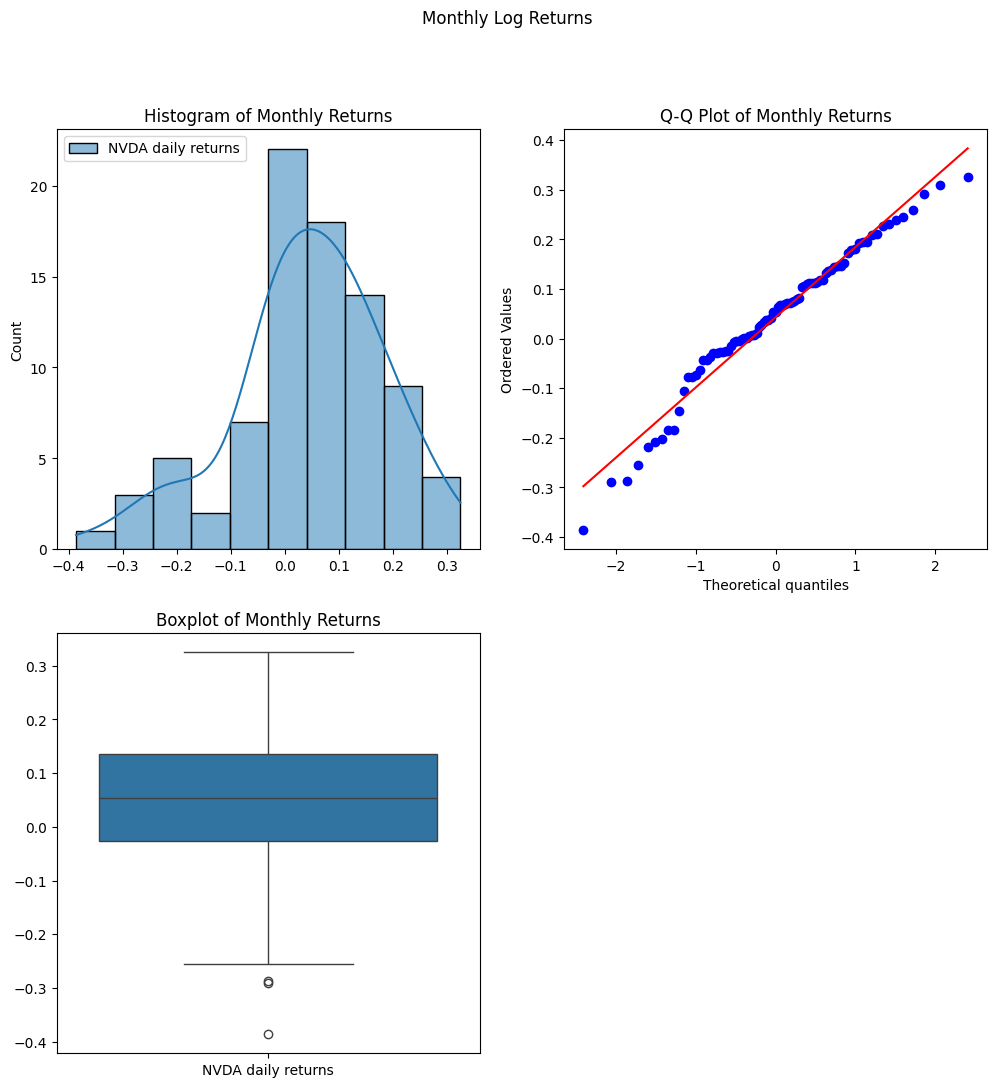

In [274]:
nvda_m_ = pd.DataFrame({'NVDA daily returns': nvda_m}, index=resample(nvda_price, 'M', plot=True).index[1:])
normally_dist_vis_check(nvda_m_, nvda_m, 'Monthly')

From the plots, we can see that the monthly return looks like it's normally distributed. The histogram is bell shaped, the q-q plot fits the normal dirtribution line and the box plot is normaly distributed too.
To double check, we also perform jaque bera test and normaltest.

In [277]:
monthly_jb_test = stats.jarque_bera(nvda_m)
monthly_normal_test = normaltest(nvda_m)
print(monthly_jb_test)
print(monthly_normal_test)

SignificanceResult(statistic=5.616924287913485, pvalue=0.060297650232706966)
NormaltestResult(statistic=6.295600695922076, pvalue=0.04294649038067683)


We can see that both statistic value is small and the p_values are small too.
So we can say that the monthly log return is likely to be normally distributed.

> 12. Now we check on the annuly return

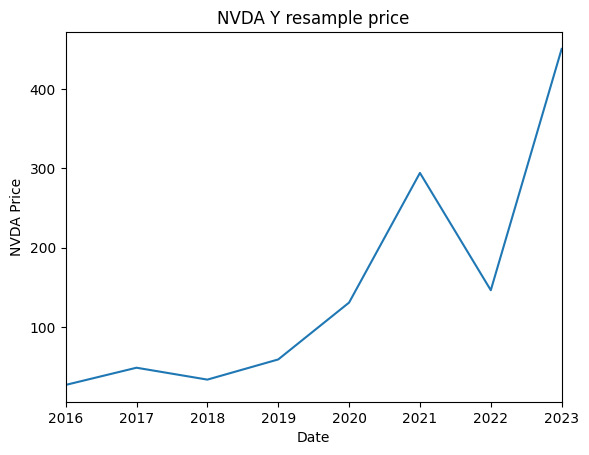

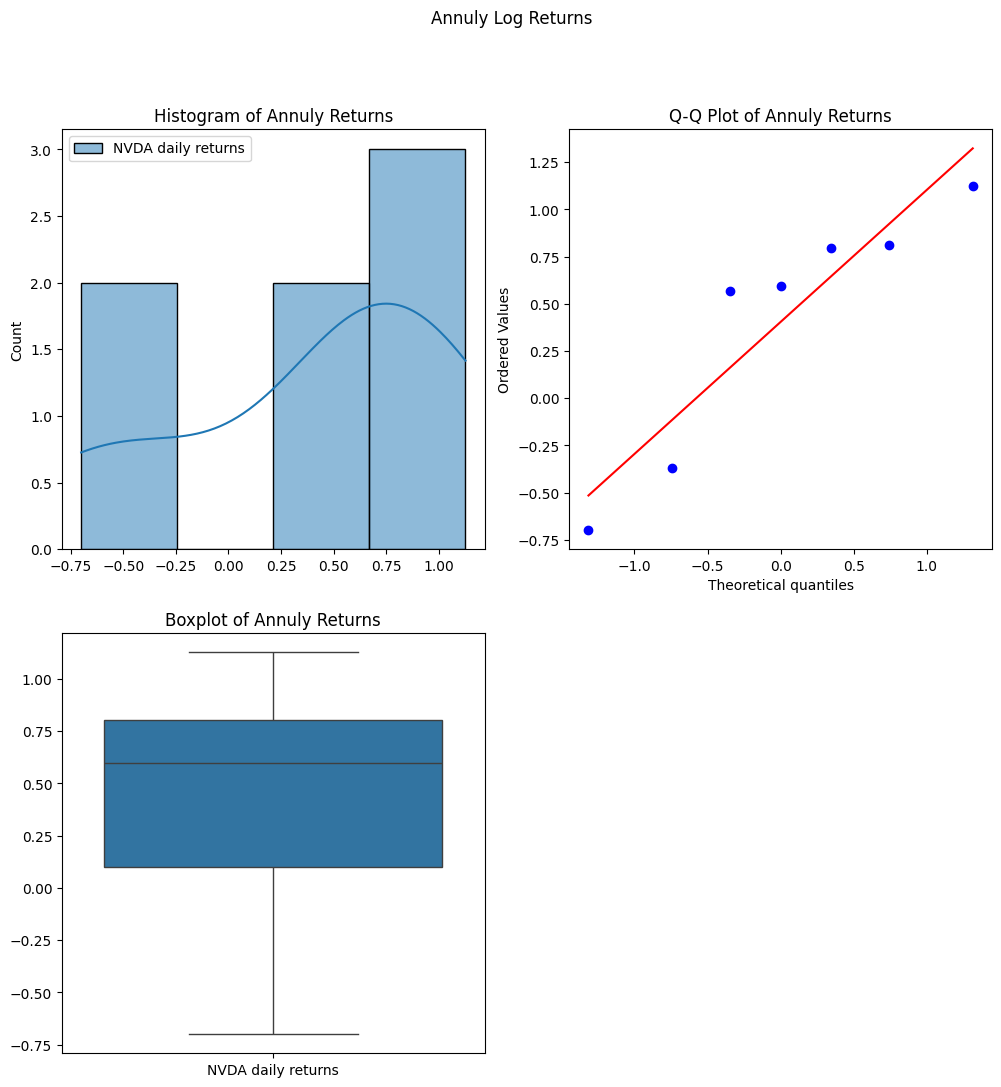

In [278]:
nvda_y_ = pd.DataFrame({'NVDA daily returns': nvda_y}, index=resample(nvda_price, 'Y', plot=True).index[1:])
normally_dist_vis_check(nvda_y_, nvda_y, 'Annuly')

Because the samples of yearly returns are too less, we can't directly use the built-in jaque-bera test which will look up the table.
We have to reproduce the jaque-bera test we were taught on the lecture.

In [285]:
from scipy.stats import skew, kurtosis
def jb(n, s, k):
    return  n / 6. * (s**2 + (((k - 3.)**2) / 4.))

def jb_from_samples(n, bootstrap_samples):
    s = skew(bootstrap_samples)
    k = kurtosis(bootstrap_samples, fisher=False)
    return jb(n, s, k)

def jb_critical_value(n, bootstrap_samples, p):
    return np.percentile(jb_from_samples(n, bootstrap_samples), (1. - p) * 100.)

def jb_test(data_sample, bootstrap_replications=100000, p=0.05):
    sample_size = len(data_sample)
    bootstrap_samples = np.random.normal(size=(sample_size, bootstrap_replications))
    critical_value = jb_critical_value(sample_size, bootstrap_samples, p)
    empirical_jb = jb(sample_size, skew(data_sample), kurtosis(data_sample, fisher=False))
    return (empirical_jb > critical_value, empirical_jb, critical_value)

In [286]:
jb_test(nvda_y_)

(array([False]), array([0.93968121]), 1.846911579345035)

In [288]:
annualy_jb_test = stats.jarque_bera(nvda_y)
print(monthly_jb_test)

SignificanceResult(statistic=5.616924287913485, pvalue=0.060297650232706966)


In [289]:
normaltest(nvda_y)

ValueError: skewtest is not valid with less than 8 samples; 7 samples were given.

Compare with the built-in jb test and normal test:
- lecture method: statistic:0.93968121, p =1.846911579345035
- built-in jb test: statistic=5.616924287913485, pvalue=0.060297650232706966
- Normaltest: reject to test with too less sample

we can see that using the built-in jb test might mistake datasets with little data.

As a result, I think annualy return has far too little data for us to say if it's normally distibuted.

---

## Exercise 2
Compute the Jarque-Bera test statistic and 
p
-values for all stocks in the index over daily, monthly and annual frequencies. Summarise your results in a single graph which shows three side-by-side boxplots of the test statistic comparing: daily, monthly and annual return distributions. Comment on whether your results support the claim that stock returns exhibit aggregational Gaussianity (see, e.g., Cont 2001; reference below).

1. First, to prevent the dataset was contaminated, we read the data from the csv again

In [291]:
prices = pd.read_csv('sap100.csv', index_col='Date', parse_dates=True)

2. We look at the dataset and find out that there are 3 columns of missing data: 'BRK.B', 'DOW','FB'. We simply drop it

In [292]:
prices = prices.drop(columns=['BRK.B', 'DOW','FB'])

3. We create empty dictionaries to store the Jarque-Bera test results

In [293]:
jb_daily_stats = {}
jb_monthly_stats = {}
jb_annual_stats = {}

4. loop through the stocks to get jb test results.

In [294]:
for stocks in prices.columns:
    # Compute daily, monthly, and annual log-returns
    log_returns_daily = get_log_return(prices[stocks],'D', plot=False)
    log_returns_monthly = get_log_return(prices[stocks],'M', plot=False)
    log_returns_annual = get_log_return(prices[stocks],'Y', plot=False)
    
    # Compute Jarque-Bera test for each frequency
    jb_daily_stats[stocks] = stats.jarque_bera(log_returns_daily)[0] 
    jb_monthly_stats[stocks] = stats.jarque_bera(log_returns_monthly)[0]
    jb_annual_stats[stocks] = stats.jarque_bera(log_returns_annual)[0]

# Convert the results to DataFrames
jb_daily_df = pd.DataFrame(list(jb_daily_stats.items()), columns=['stocks', 'JB_Statistic'])
jb_monthly_df = pd.DataFrame(list(jb_monthly_stats.items()), columns=['stocks', 'JB_Statistic'])
jb_annual_df = pd.DataFrame(list(jb_annual_stats.items()), columns=['stocks', 'JB_Statistic'])

5. Combine the datafram and plot them on the same plot

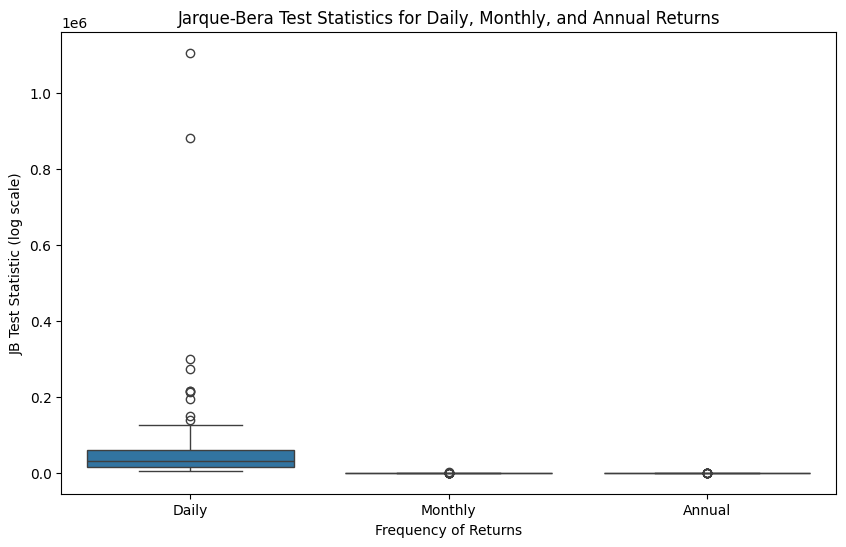

In [295]:
# Combine the dataframe to plot on the smae plot
jb_combined_df = pd.concat([jb_daily_df.assign(Frequency='Daily'),
                            jb_monthly_df.assign(Frequency='Monthly'),
                            jb_annual_df.assign(Frequency='Annual')])

# Plotting the side-by-side boxplots
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Frequency', y='JB_Statistic', data=jb_combined_df)
plt.title('Jarque-Bera Test Statistics for Daily, Monthly, and Annual Returns')
plt.ylabel('JB Test Statistic (log scale)')
plt.xlabel('Frequency of Returns')
plt.show()

6. It's hard to observe results so we try to plot it in log scale

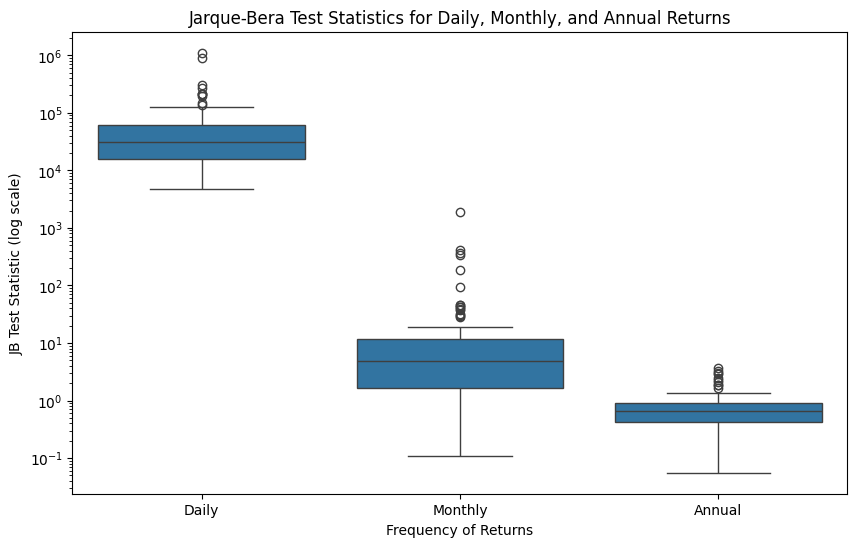

In [296]:
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Frequency', y='JB_Statistic', data=jb_combined_df)
boxplot.set_yscale('log')
plt.title('Jarque-Bera Test Statistics for Daily, Monthly, and Annual Returns')
plt.ylabel('JB Test Statistic (log scale)')
plt.xlabel('Frequency of Returns')
plt.show()


The boxplots will provide a visual summary of the distribution of Jarque-Bera statistics across different frequencies for all stocks in the index. If stock returns exhibit aggregational Gaussianity, we would expect the deviation from normality to decrease when we move from daily to monthly to annual frequencies.

We can see the boxplots shrink in size with increasing aggregation level, indicating smaller deviations from normality.

And the median statistics for the annual returns smaller than those of the daily or monthly returns, suggesting a trend towards normality.

## Exercise 3
Download data for the S&P 100 index (symbol ^OEX), and repeat Exercise 1 with this data.

1. Input necessary libraries

In [298]:
import yfinance as yf
from pandas_datareader import data
import datetime

2. Download the datas with `yfinance`

In [309]:
# Override yfinance with pandas_datareader
yf.pdr_override()

# Download the S&P 100 index data using yfinance
start = datetime.datetime(2016, 6, 6)
end = datetime.datetime(2023, 7, 13)
sp100_index = data.get_data_yahoo("^OEX", start, end)

[*********************100%%**********************]  1 of 1 completed


3. Calaulate log return for daily, monthly and annuly returns

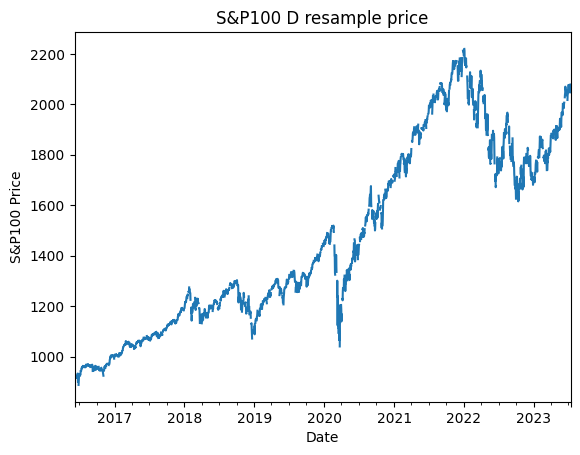

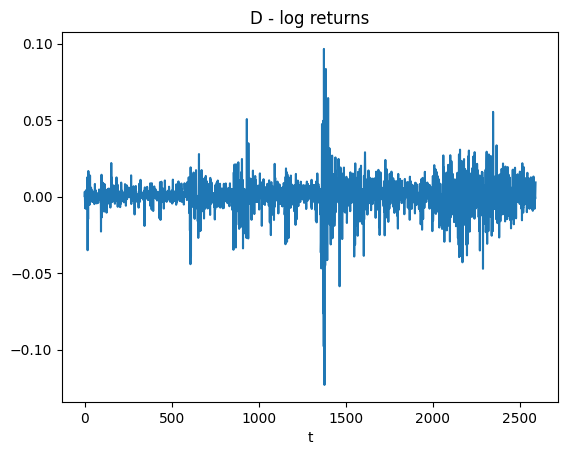

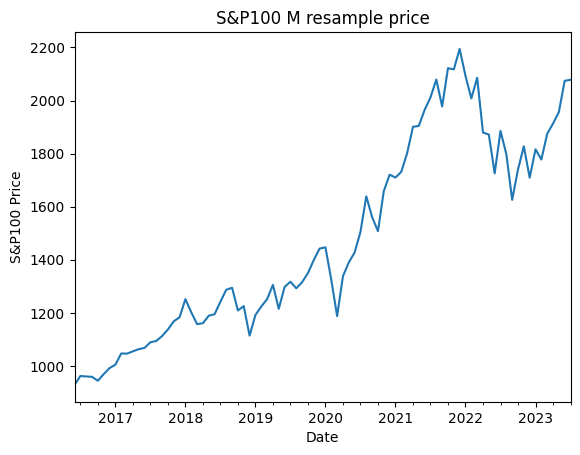

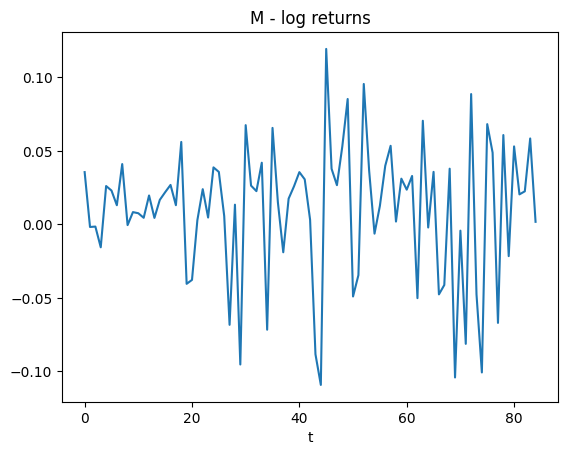

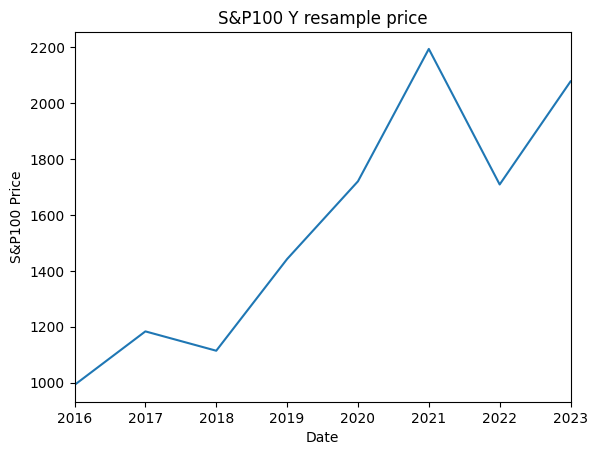

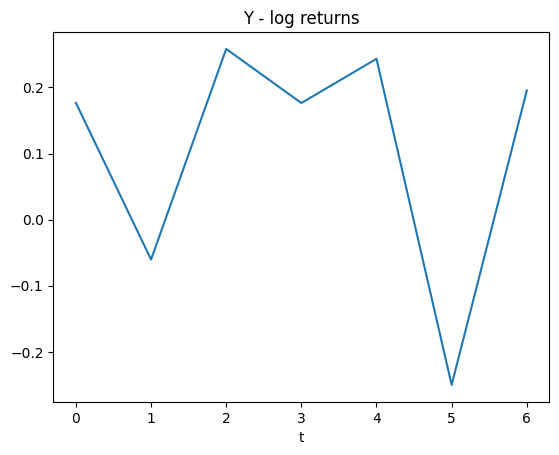

In [310]:
sp100_daily_returns = get_log_return(sp100_index['Adj Close'],'D', 'S&P100')
sp100_monthly_returns = get_log_return(sp100_index['Adj Close'],'M','S&P100')
sp100_annual_returns = get_log_return(sp100_index['Adj Close'],'Y','S&P100')

4. Plotting histograms and probplots for Daily, Monthly, and Annual returns

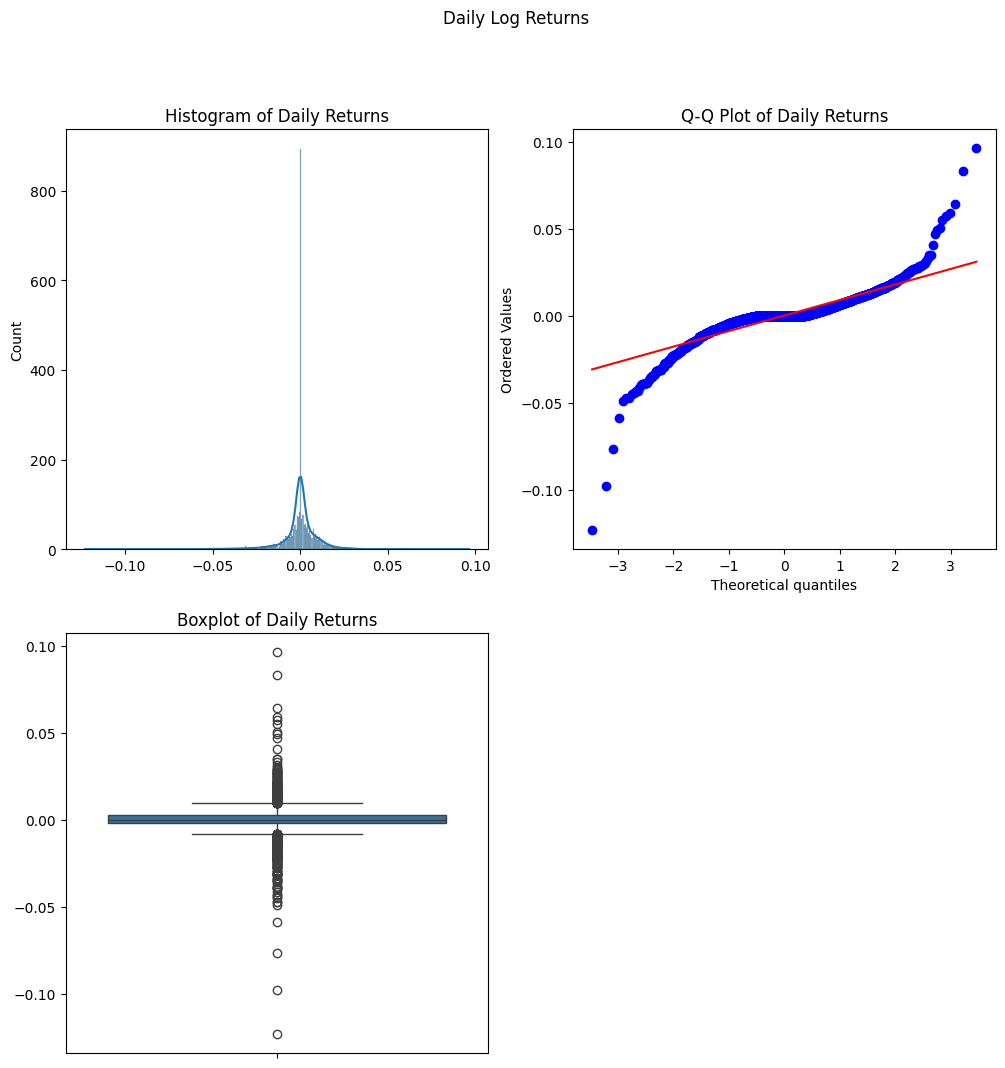

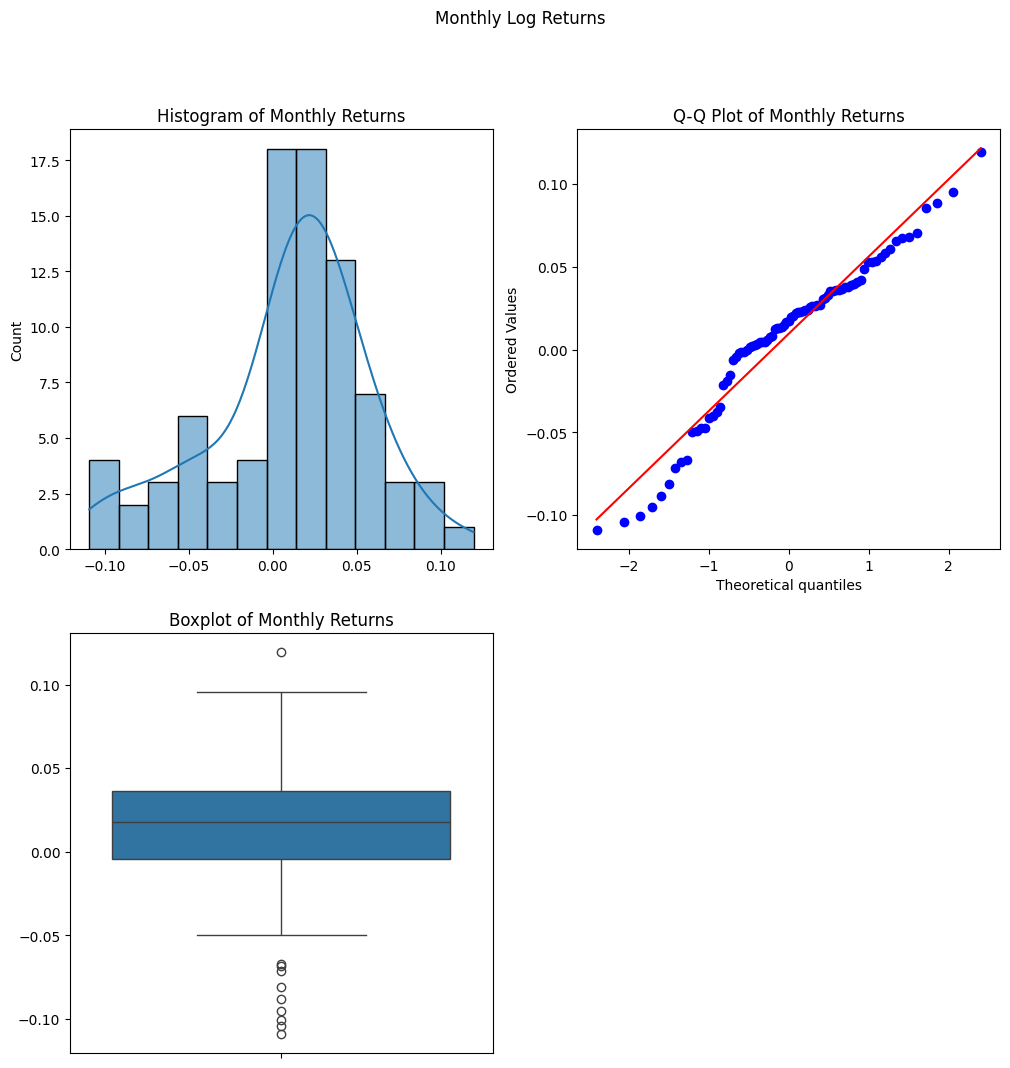

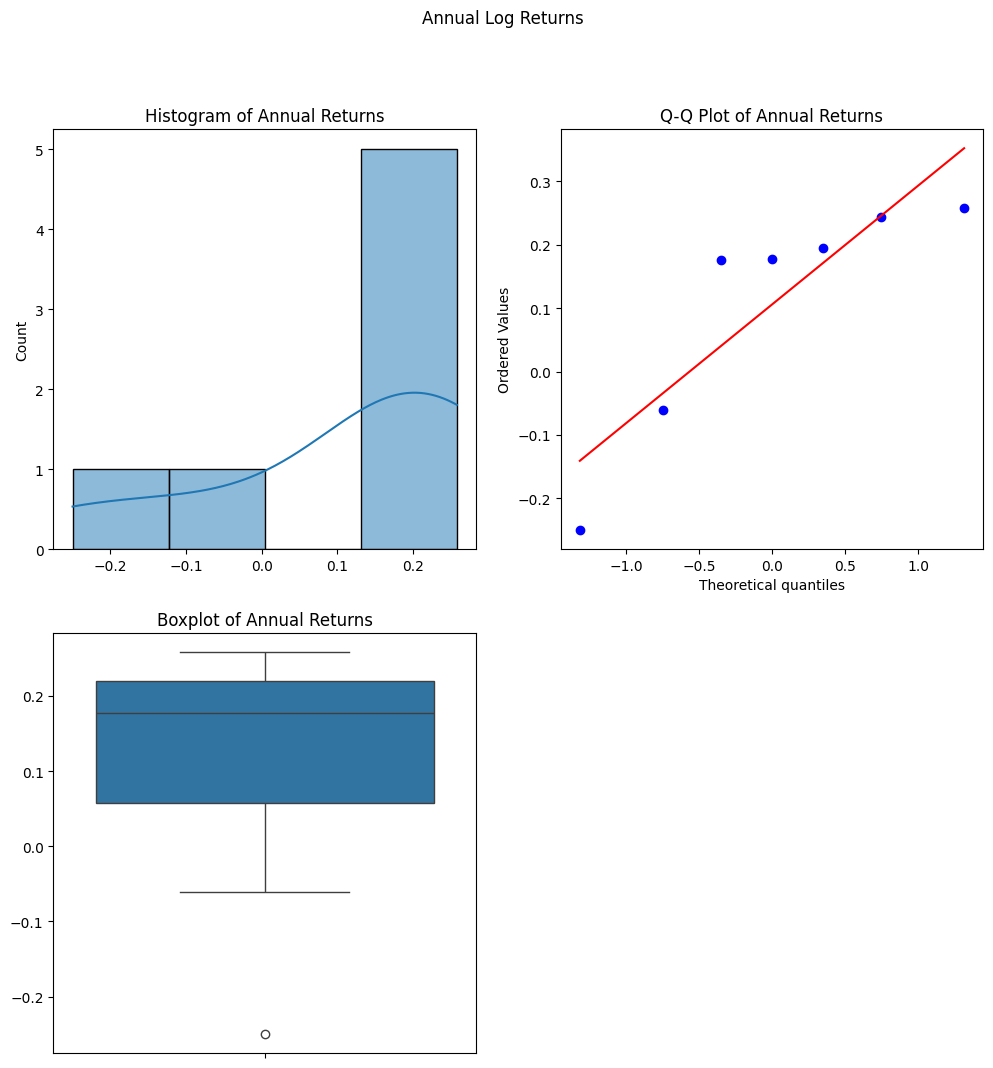

In [311]:
normally_dist_vis_check(sp100_daily_returns, sp100_daily_returns, 'Daily')
normally_dist_vis_check(sp100_monthly_returns, sp100_monthly_returns, 'Monthly')
normally_dist_vis_check(sp100_annual_returns, sp100_annual_returns, 'Annual')

5. Perform jb test on the returns

In [312]:
jb_test_daily = stats.jarque_bera(sp100_daily_returns)
jb_test_monthly = stats.jarque_bera(sp100_monthly_returns)
jb_test_annual = stats.jarque_bera(sp100_annual_returns)

# Print jb test results
print(f'Daily returns normality test: Statistic={jb_test_daily[0]}, P-value={jb_test_daily[1]}')
print(f'Monthly returns normality test: Statistic={jb_test_monthly[0]}, P-value={jb_test_monthly[1]}')
print(f'Annual returns normality test: Statistic={jb_test_annual[0]}, P-value={jb_test_annual[1]}')


Daily returns normality test: Statistic=52997.03075152437, P-value=0.0
Monthly returns normality test: Statistic=5.719254170565842, P-value=0.05729012061154539
Annual returns normality test: Statistic=1.4852144180147424, P-value=0.4758716000147588


6. perform the normality test on returns

In [314]:
# Perform the normality test on the returns
normal_test_daily = normaltest(sp100_daily_returns)
normal_test_monthly = normaltest(sp100_monthly_returns)
#normal_test_annual = normaltest(sp100_annual_returns)

# Print normality test results
print(f'Daily returns normality test: Statistic={normal_test_daily[0]}, P-value={normal_test_daily[1]}')
print(f'Monthly returns normality test: Statistic={normal_test_monthly[0]}, P-value={normal_test_monthly[1]}')
#print(f'Annual returns normality test: Statistic={normal_test_annual[0]}, P-value={normal_test_annual[1]}')

Daily returns normality test: Statistic=905.524483431403, P-value=2.3326888244182395e-197
Monthly returns normality test: Statistic=6.262703286901933, P-value=0.04365874629531375


7. We try the whole process again with the full yahoo finance data without the start, end time to see if we can calculate the annual normal

[*********************100%%**********************]  1 of 1 completed


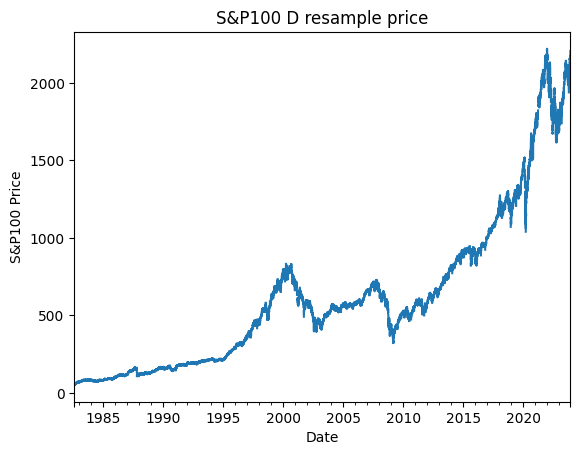

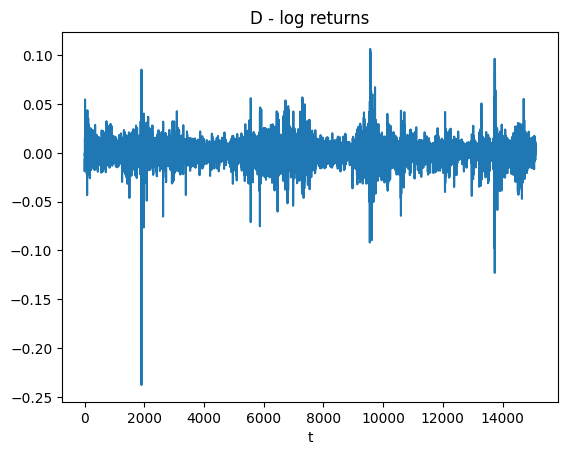

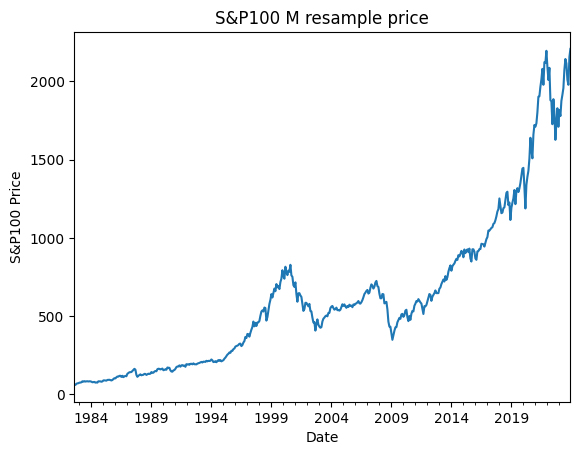

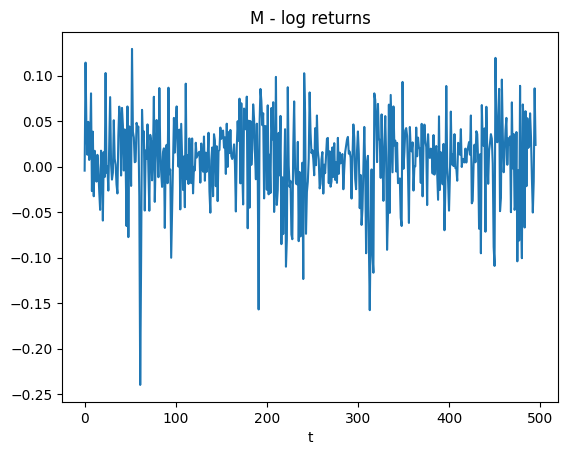

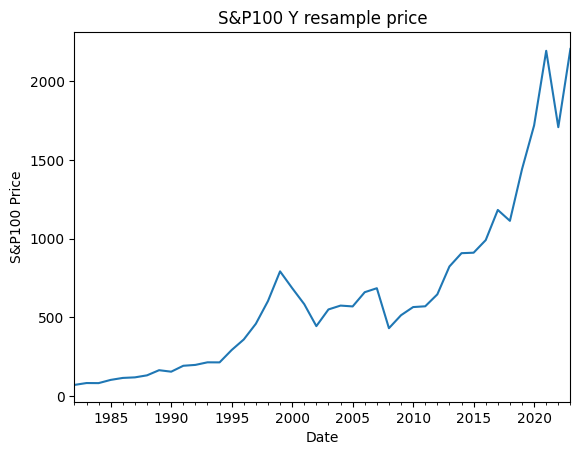

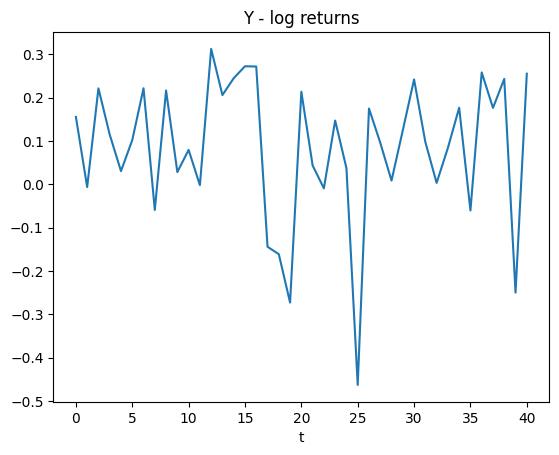

In [315]:
# Override yfinance with pandas_datareader
yf.pdr_override()

# Download the S&P 100 index data using yfinance
sp100_index_full = data.get_data_yahoo("^OEX")

sp100_daily_returns_full = get_log_return(sp100_index_full['Adj Close'],'D', 'S&P100')
sp100_monthly_returns_full = get_log_return(sp100_index_full['Adj Close'],'M','S&P100')
sp100_annual_returns_full = get_log_return(sp100_index_full['Adj Close'],'Y','S&P100')

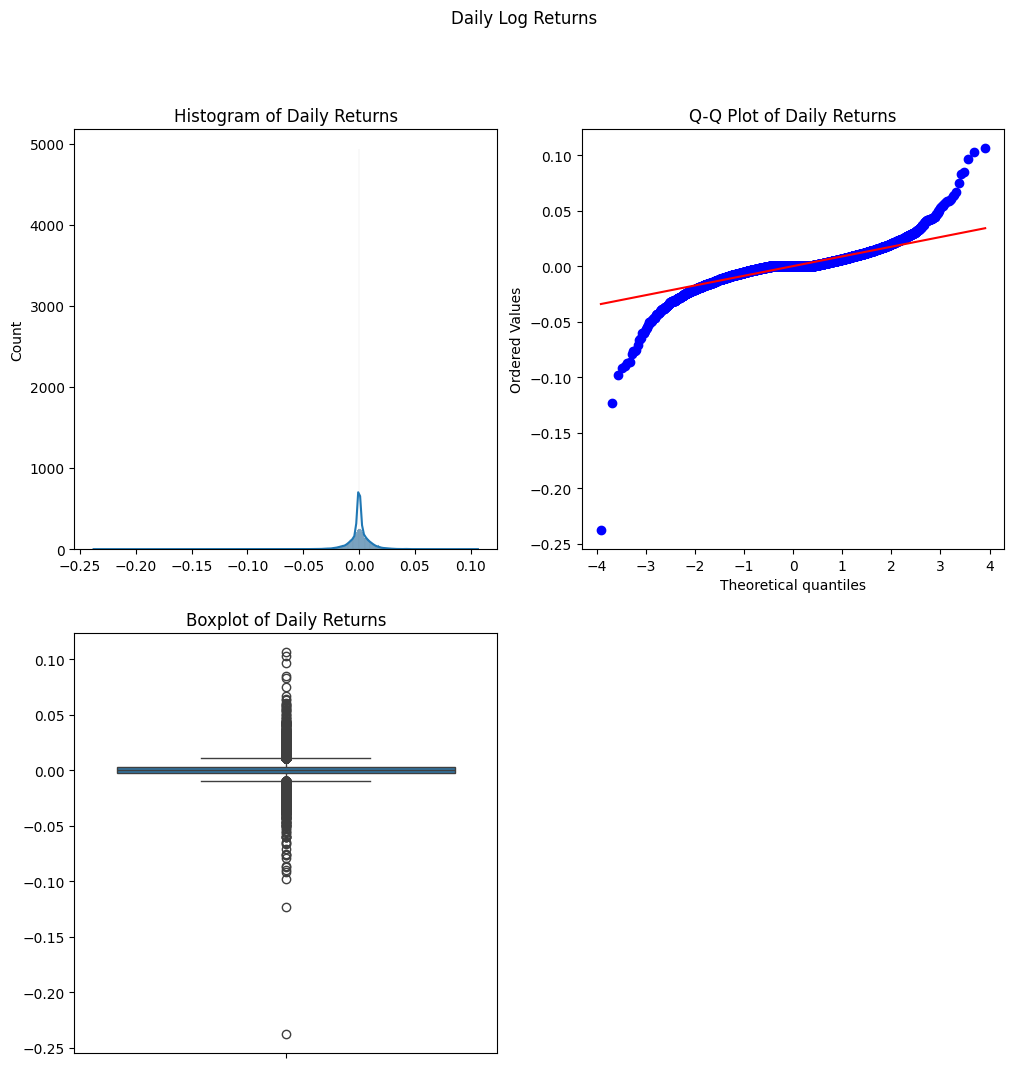

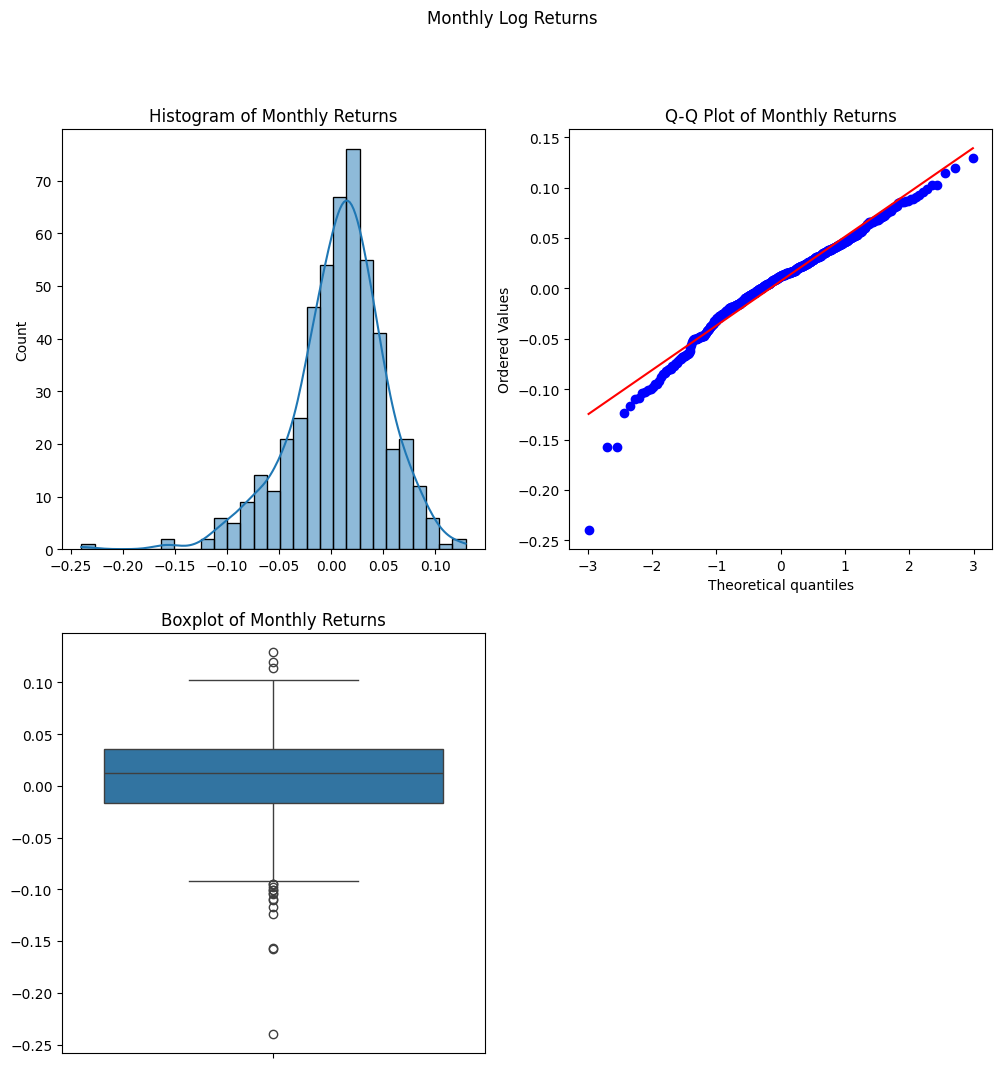

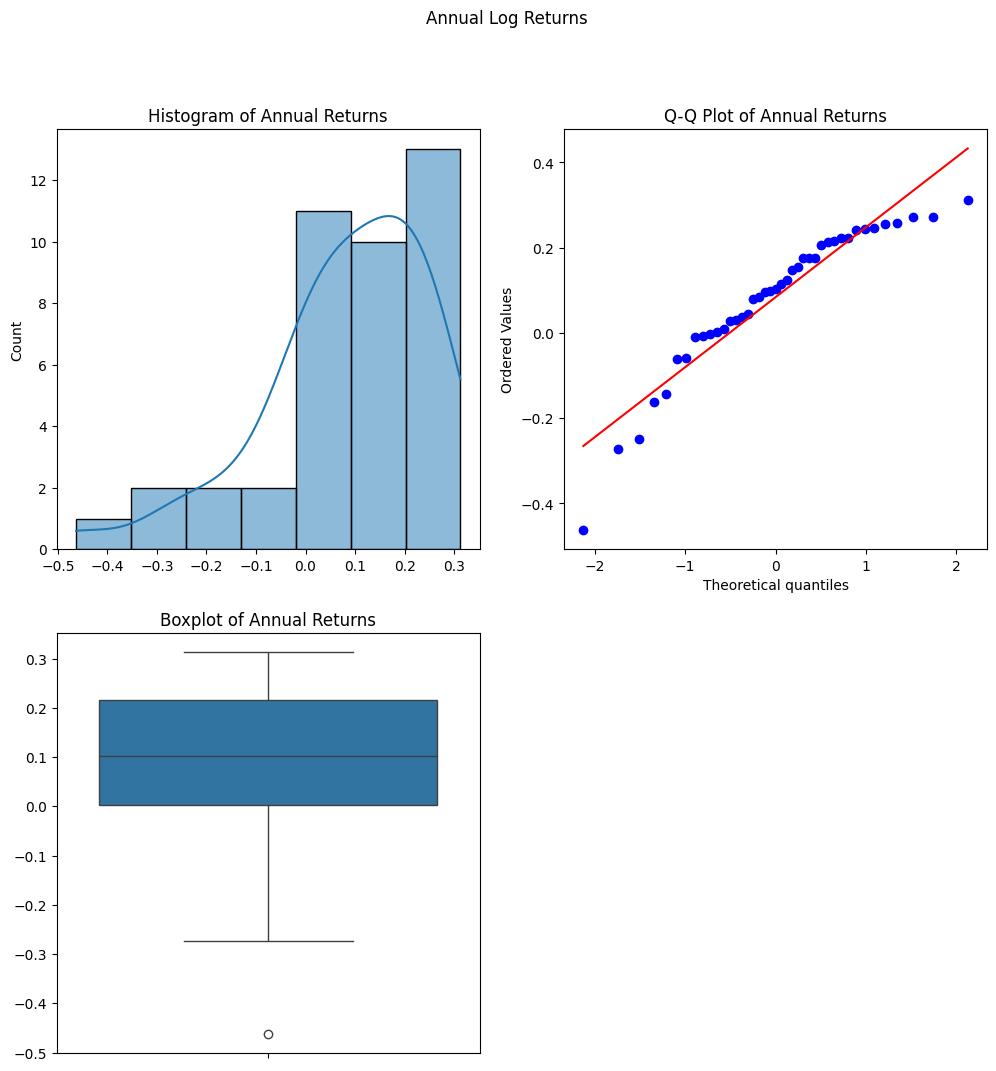

In [316]:
normally_dist_vis_check(sp100_daily_returns_full, sp100_daily_returns_full, 'Daily')
normally_dist_vis_check(sp100_monthly_returns_full, sp100_monthly_returns_full, 'Monthly')
normally_dist_vis_check(sp100_annual_returns_full, sp100_annual_returns_full, 'Annual')

In [317]:
jb_test_daily_full = stats.jarque_bera(sp100_daily_returns_full)
jb_test_monthly_full = stats.jarque_bera(sp100_monthly_returns_full)
jb_test_annual_full = stats.jarque_bera(sp100_annual_returns_full)

# Print jb test results
print(f'Daily returns normality test: Statistic={jb_test_daily_full[0]}, P-value={jb_test_daily_full[1]}')
print(f'Monthly returns normality test: Statistic={jb_test_monthly_full[0]}, P-value={jb_test_monthly_full[1]}')
print(f'Annual returns normality test: Statistic={jb_test_annual_full[0]}, P-value={jb_test_annual_full[1]}')

Daily returns normality test: Statistic=866332.2997206266, P-value=0.0
Monthly returns normality test: Statistic=158.9453492363603, P-value=3.058130056767356e-35
Annual returns normality test: Statistic=13.071301377254498, P-value=0.0014507847114461022


In [318]:
# Perform the normality test on the returns
normal_test_daily_full = normaltest(sp100_daily_returns_full)
normal_test_monthly_full = normaltest(sp100_monthly_returns_full)
normal_test_annual_full = normaltest(sp100_annual_returns_full)

# Print normality test results
print(f'Daily returns normality test: Statistic={normal_test_daily_full[0]}, P-value={normal_test_daily_full[1]}')
print(f'Monthly returns normality test: Statistic={normal_test_monthly_full[0]}, P-value={normal_test_monthly_full[1]}')
print(f'Annual returns normality test: Statistic={normal_test_annual_full[0]}, P-value={normal_test_annual_full[1]}')

Daily returns normality test: Statistic=7060.792606622798, P-value=0.0
Monthly returns normality test: Statistic=72.51626801642513, P-value=1.7918121457768646e-16
Annual returns normality test: Statistic=12.82268469800159, P-value=0.0016428177864965178


We can now observe the data is more normality when the resample goes from day -> month -> year

## Exercise 4
Estimate the 
α
 and 
β
 of each stock according to the single-index model using ordinary least squares regression over monthly excess returns, storing your results in a DataFrame. Produce a single graph showing side-by-side boxplots summarising the distribution of the alpha and beta coefficients over all stocks in the index.



1. Calculate monthly excess returns for each stock. Excess returns are calculated as the return on the stock minus the risk-free rate. For the sake of this exercise, we assume the risk-free rate is the 10 Year Treasury Rate 4.04% for for Dec 13 2023 which is 4.04%.

In [319]:
sp100_monthly_returns = sp100_index['Adj Close'].resample('M').ffill().pct_change().dropna()
stocks_monthly_returns = prices.resample('M').ffill().pct_change().dropna()

# Assume a risk-free rate proxy (risk-free rate is zero if we don't have data)
risk_free_rate = 0.0404 #10 Year Treasury Rate 4.04% for for Dec 13 2023
sp100_excess_returns = sp100_monthly_returns - risk_free_rate
stocks_excess_returns = stocks_monthly_returns.sub(risk_free_rate, axis=0)  # Excess returns for all stocks

2. estimate the alpha and beta for each stock.

In [320]:
alphas_betas = pd.DataFrame(index=prices.columns, columns=['alpha', 'beta']) # Initialize a DataFrame to store alphas and betas

for stocks in prices.columns:
    # Prepare the data for regression
    y = stocks_excess_returns[stocks].dropna()
    X = sp100_excess_returns.loc[y.index]
    
    regression_result = (beta, alpha, rvalue, pvalue, stderr) = \
    stats.linregress(x=X, y=y)
    print(regression_result)
    alphas_betas.loc[stocks, 'alpha'] = alpha
    alphas_betas.loc[stocks, 'beta'] = beta

# Drop rows with any NaN values (stocks that did not have enough data for regression)
alphas_betas.dropna(inplace=True)

LinregressResult(slope=1.3250028255316544, intercept=0.0272038054538697, rvalue=0.7426596319021205, pvalue=4.0986567852909196e-16, stderr=0.13114392715751622, intercept_stderr=0.007250096575740044)
LinregressResult(slope=0.393120976916214, intercept=-0.0331157852757404, rvalue=0.3772238607232943, pvalue=0.0003725984510718824, stderr=0.10593909734983512, intercept_stderr=0.005856685121305753)
LinregressResult(slope=0.6572227407772598, intercept=-0.029684222160434176, rvalue=0.38157955062841487, pvalue=0.0003142632087358392, stderr=0.17475045411389756, intercept_stderr=0.009660818433921465)
LinregressResult(slope=1.087862298648867, intercept=-0.0049484000309654025, rvalue=0.567327144562541, pvalue=1.5025505396712966e-08, stderr=0.17332490417035623, intercept_stderr=0.00958200902971778)
LinregressResult(slope=0.581441696082372, intercept=-0.012777367891187101, rvalue=0.5061268331573051, pvalue=7.751072677099432e-07, stderr=0.10875425353946953, intercept_stderr=0.006012316835964773)
Linreg

3. Take a look at the alpha and betas

In [321]:
alphas_betas

,alpha,beta
AAPL,0.027204,1.325003
VZ,-0.033116,0.393121
WBA,-0.029684,0.657223
WFC,-0.004948,1.087862
WMT,-0.012777,0.581442
...,...,...
UPS,0.001932,1.093313
USB,-0.01251,0.882707
V,0.003344,0.93312
ABBV,-0.010697,0.590599


4. Plot side-by-side boxplots summarizing the distribution of alpha and beta coefficients

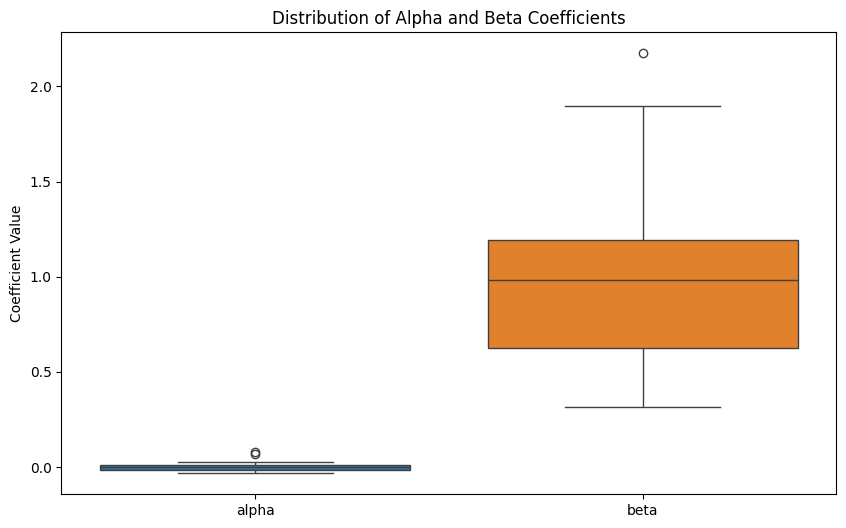

In [322]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=alphas_betas)
plt.title('Distribution of Alpha and Beta Coefficients')
plt.ylabel('Coefficient Value')
plt.show()

Alpha represents the stock's performance independent of the market, while beta represents how much the stock is expected to gain or lose based on market movement.
Alphas are small so this may suggest superior stock performance in not independent of the market, whereas a beta close to 1 suggests that the stock's performance is closely tied to the market.

## Exercise 5
Compute the covariance matrix of the components of the index using the monthly excess-returns. According to the single-index model (see Elton and Gruber 1997; reference below), the covariance of a given pair of stocks should be directly proportional to the product of the corresponding 
β
 values. Test this hypothesis, and summarise your results in a single graph. Provide a written explanation of your results, and a short critical discussion.

1. We calculate the empirical covariance matrix of stock excess returns.

In [326]:
cov_matrix = stocks_excess_returns.cov()
cov_matrix

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
AAPL,0.006988,0.000540,0.001081,0.001730,0.001717,0.001727,0.001800,0.004632,0.000925,0.001729,...,0.001508,0.009175,0.002686,0.001476,0.002288,0.002638,0.001286,0.002812,0.000566,0.003483
VZ,0.000540,0.002384,0.001165,0.001311,0.000831,0.001429,0.001046,0.000643,0.000630,0.001237,...,0.000710,0.000850,0.000690,0.000746,0.000868,0.001663,0.001292,0.001111,0.000872,0.001006
WBA,0.001081,0.001165,0.006512,0.002761,0.001366,0.002657,0.001774,0.000769,0.001754,0.002547,...,0.001125,0.000398,0.001115,0.001691,0.001559,0.002426,0.002274,0.001004,0.001315,0.001755
WFC,0.001730,0.001311,0.002761,0.008072,0.000968,0.005252,0.000808,0.001823,0.004982,0.001565,...,0.001360,0.004086,0.002348,0.001826,0.002886,0.002808,0.005519,0.002668,0.002011,0.002405
WMT,0.001717,0.000831,0.001366,0.000968,0.002897,0.000873,0.001047,0.001346,0.000936,0.000861,...,0.000832,0.002694,0.001085,0.001328,0.001323,0.001922,0.000592,0.001202,0.000410,0.001629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UPS,0.002638,0.001663,0.002426,0.002808,0.001922,0.001928,0.001882,0.002813,0.002310,0.001971,...,0.001486,0.004288,0.002273,0.002102,0.003340,0.006808,0.002665,0.001911,0.001789,0.002848
USB,0.001286,0.001292,0.002274,0.005519,0.000592,0.003740,0.001011,0.001730,0.004960,0.001137,...,0.001384,0.002062,0.002325,0.001429,0.002550,0.002665,0.005991,0.002238,0.001286,0.001992
V,0.002812,0.001111,0.001004,0.002668,0.001202,0.002796,0.001488,0.003037,0.002570,0.001890,...,0.001743,0.003407,0.001964,0.001310,0.001934,0.001911,0.002238,0.003790,0.001529,0.002614
ABBV,0.000566,0.000872,0.001315,0.002011,0.000410,0.001827,0.001191,0.000860,0.002504,0.002128,...,0.001002,0.001444,0.001438,0.001951,0.002228,0.001789,0.001286,0.001529,0.006215,0.001887


2. We calculate the predicted covariance for each pair of stocks based on the single-index model formula, which involves the product of their beta values and the market variance.

In [328]:
betas = alphas_betas['beta'] # take betas from the previous exercise contains the beta values

# Calculate the covariances according to the single-index model
market_variance = sp100_monthly_returns.var()
predicted_covariances = np.outer(betas, betas) * market_variance

predicted_cov_df = pd.DataFrame(predicted_covariances, index=prices.columns, columns=prices.columns) # Convert predicted_covariances to a DataFrame
predicted_cov_df

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
AAPL,0.003854,0.001143,0.001912,0.003164,0.001691,0.002862,0.002084,0.003861,0.002859,0.002024,...,0.001501,0.006325,0.002919,0.00197,0.003099,0.00318,0.002568,0.002714,0.001718,0.003488
VZ,0.001143,0.000339,0.000567,0.000939,0.000502,0.000849,0.000618,0.001146,0.000848,0.000601,...,0.000445,0.001877,0.000866,0.000585,0.000919,0.000944,0.000762,0.000805,0.00051,0.001035
WBA,0.001912,0.000567,0.000948,0.00157,0.000839,0.001419,0.001034,0.001915,0.001418,0.001004,...,0.000744,0.003137,0.001448,0.000977,0.001537,0.001577,0.001274,0.001346,0.000852,0.00173
WFC,0.003164,0.000939,0.00157,0.002598,0.001389,0.00235,0.001711,0.00317,0.002347,0.001662,...,0.001232,0.005193,0.002396,0.001618,0.002544,0.002611,0.002108,0.002228,0.00141,0.002864
WMT,0.001691,0.000502,0.000839,0.001389,0.000742,0.001256,0.000914,0.001694,0.001254,0.000888,...,0.000658,0.002776,0.001281,0.000865,0.00136,0.001396,0.001127,0.001191,0.000754,0.001531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UPS,0.00318,0.000944,0.001577,0.002611,0.001396,0.002361,0.001719,0.003186,0.002359,0.00167,...,0.001238,0.005219,0.002408,0.001626,0.002557,0.002624,0.002119,0.00224,0.001418,0.002878
USB,0.002568,0.000762,0.001274,0.002108,0.001127,0.001907,0.001388,0.002572,0.001904,0.001349,...,0.001,0.004214,0.001944,0.001313,0.002064,0.002119,0.001711,0.001808,0.001144,0.002324
V,0.002714,0.000805,0.001346,0.002228,0.001191,0.002015,0.001468,0.002719,0.002013,0.001426,...,0.001057,0.004454,0.002056,0.001387,0.002182,0.00224,0.001808,0.001911,0.00121,0.002456
ABBV,0.001718,0.00051,0.000852,0.00141,0.000754,0.001276,0.000929,0.001721,0.001274,0.000902,...,0.000669,0.002819,0.001301,0.000878,0.001381,0.001418,0.001144,0.00121,0.000766,0.001555


3. We then plot a scatter plot comparing the covariances with the predicted covariances. 

    If the single-index model held perfectly, all points would lie on the diagonal line (where empirical=covariance predicted).

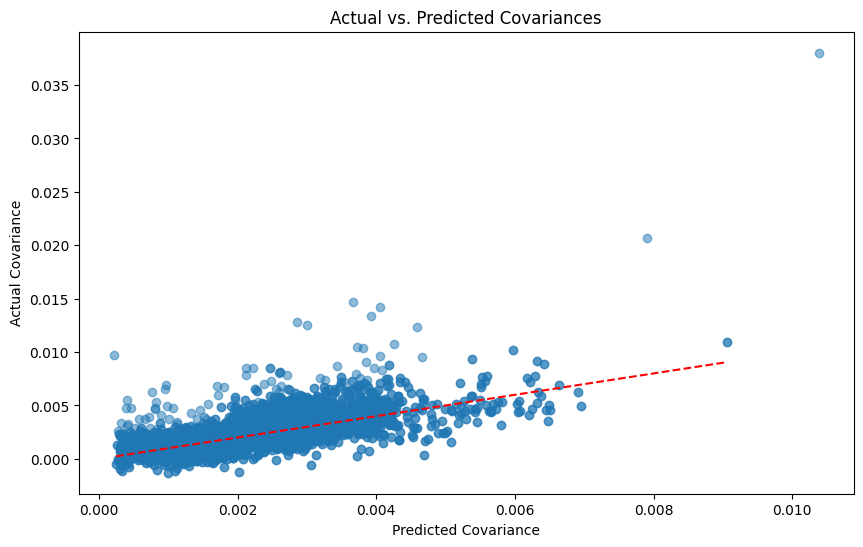

In [332]:
mask = np.eye(len(prices.columns), dtype=bool)
perfect_line = predicted_cov_df.values.flatten()
line = perfect_line[~mask.flatten()]
plt.figure(figsize=(10, 6))
plt.scatter(predicted_covariances, cov_matrix, alpha=0.5)
plt.title('Actual vs. Predicted Covariances')
plt.xlabel('Predicted Covariance')
plt.ylabel('Actual Covariance')
plt.plot([min(line), max(line)], [min(line), max(line)],'r--')  # Line representing perfect model
plt.show()

4. We try to flatten the cov_matrix too to and remove self-covariances and plot again

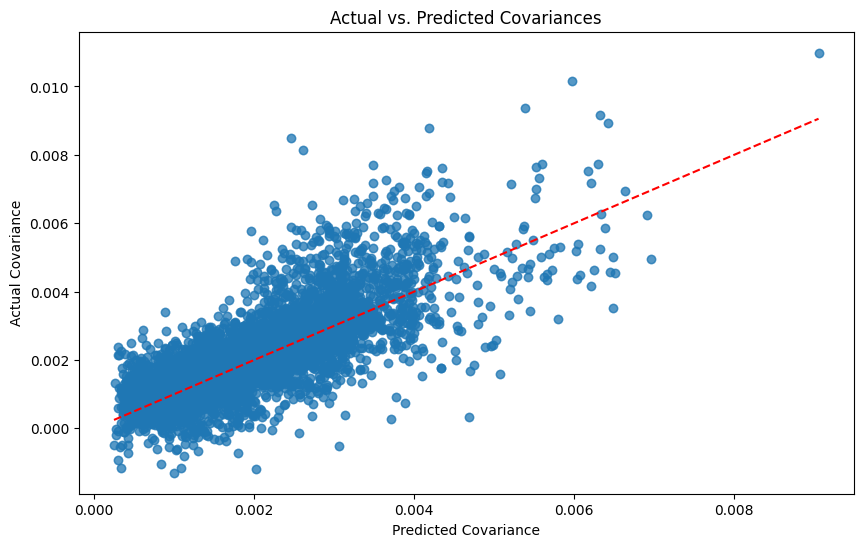

In [334]:
# Flatten the covariance matrices and remove self-covariances (variance)
actual_covariances = cov_matrix.values.flatten()
predicted_covariances = predicted_cov_df.values.flatten()
mask = np.eye(len(prices.columns), dtype=bool)

actual_covariances = actual_covariances[~mask.flatten()]
predicted_covariances = predicted_covariances[~mask.flatten()]

# Plotting the relationship between actual and predicted covariances
plt.figure(figsize=(10, 6))
plt.scatter(predicted_covariances, actual_covariances, alpha=0.5)
plt.title('Actual vs. Predicted Covariances')
plt.xlabel('Predicted Covariance')
plt.ylabel('Actual Covariance')
plt.plot([min(line), max(line)], [min(line), max(line)], 'r--')  # Line representing perfect model
plt.show()

The single-index model suggests that how well a stock does is only tied to how well the overall market does. It doesn't take into account the unique factors of the company or the industry it's in which could also play a part in the stock's performance and in how it moves in relation to other stocks.

If what the model predicts about how stocks move together matches real-life observations perfectly, it would mean that the risks specific to a particular stock or sector don't really matter or they're evened out when you have a mix of different stocks. However, any differences could show that these unique risks do matter.

In actual practice, the single-index model is a bit too simple. We might see that it doesn't always line up with what happens in the real world because of things it doesn't account for, like the factors unique to a company or its industry, the fact that stock prices might not always move in a straight-line relationship with the market, or because the relationship between a stock and the market can change over time.